# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [1]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine

Running this project require the following imports 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from scipy.cluster.hierarchy import dendrogram, linkage

%matplotlib inline

In [3]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



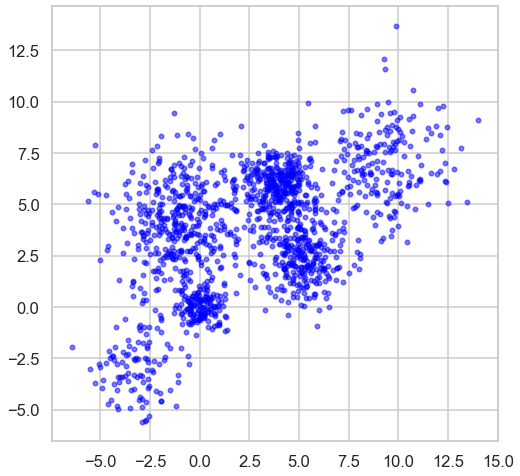

In [25]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

In [12]:
print(Multi_blob_Data)

[[-2.3542716  -3.17974359]
 [-2.1580049  -1.02006119]
 [-3.30439939 -3.30437804]
 ...
 [ 9.86405669 13.6746041 ]
 [ 5.457008    9.9319843 ]
 [ 8.51133922  7.48845914]]


In [11]:
Multi_blob_Data.shape

(1450, 2)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [21]:
inertias = []
clusters = []
K= [2, 3, 4, 6, 8, 10]
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(Multi_blob_Data)
    inertias.append(kmeans.inertia_) 
    clusters.append(kmeans.labels_)


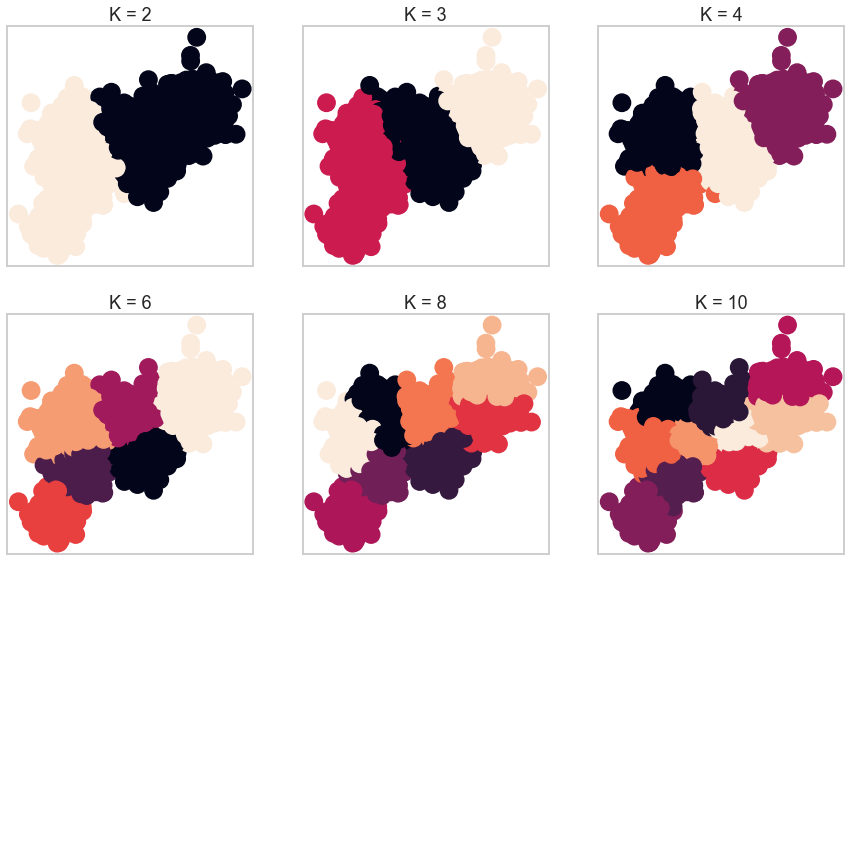

In [6]:
#visualize results for each value of K

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for x, ax in enumerate(axes):
    if x < len(K):
        ax.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], s=300, c=clusters[x])
        ax.set_title('K = {}'.format(K[x]))
        ax.set_xticks(())
        ax.set_yticks(())
    else:
        ax.axis('off')
        
plt.show()   

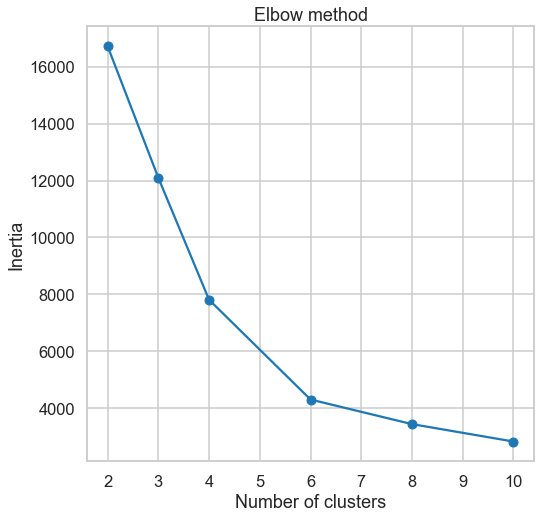

In [22]:
#The elbow method for best value of K 
plt.plot(K, inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

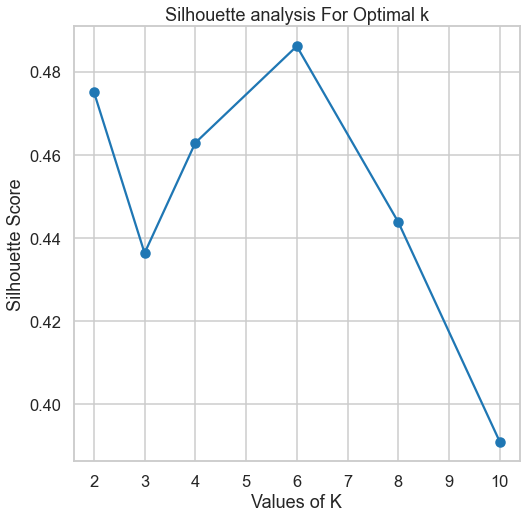

In [23]:
# silhouette score
silhouette_avg = []
for l in K:
    kmeans = KMeans(n_clusters=l)
    clusters= kmeans.fit(Multi_blob_Data)
    silhouette_avg.append(silhouette_score(Multi_blob_Data,kmeans.labels_,metric='euclidean'))
    
plt.plot(K,silhouette_avg)
plt.scatter(K,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score');
plt.title('Silhouette analysis For Optimal k')

#best silhouette score for k =6 as it has the highest score
bestsil_score = max(silhouette_avg)
bestsil_score

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

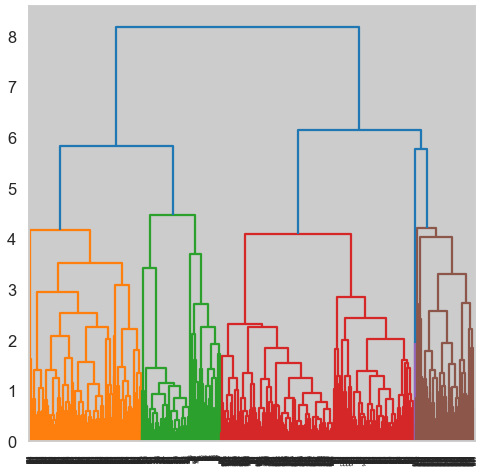

In [16]:
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))

In [10]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

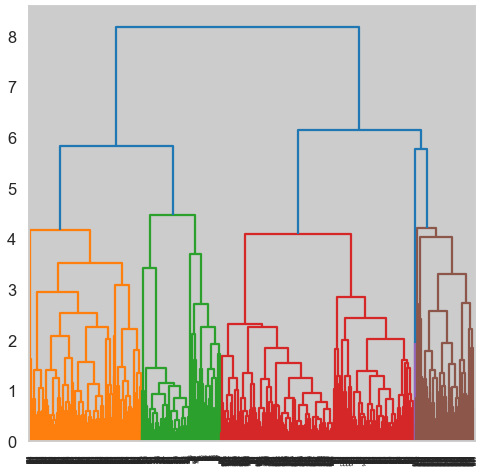

silhouette_score_euclidean=0.41478815574933364


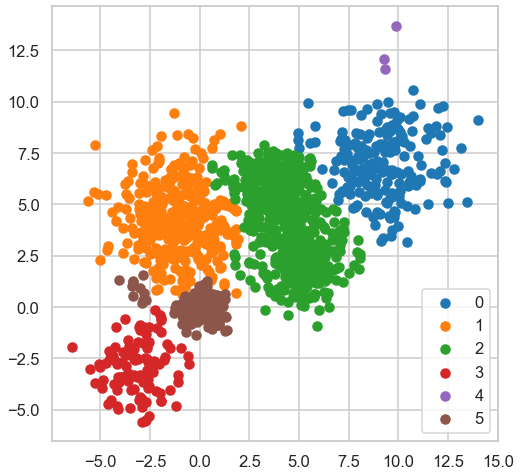

silhouette_score_euclidean=0.41478815574933364


In [20]:
#euclidean average 
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='average')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))
plt.show()

#plotting resulting clusters
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')

In [ ]:
#euclidean single
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='single')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='single'))
plt.show()


#plotting resulting clusters
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')

In [ ]:
#manhattan single 
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='single')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='single'))
plt.show()


#plotting resulting clusters
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')

In [ ]:
#manhattan average 
model = AgglomerativeClustering(n_clusters=6, affinity='manhattan', linkage='average')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))
plt.show()


#plotting resulting clusters
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')

In [ ]:
#cosine average
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='average')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='average'))
plt.show()


#plotting resulting clusters
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')

In [ ]:
#cosine single
model = AgglomerativeClustering(n_clusters=6, affinity='cosine', linkage='single')
model.fit(Multi_blob_Data)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(Multi_blob_Data, method='single'))
plt.show()


#plotting resulting clusters
u_labels = np.unique(model.labels_)
for i in u_labels:
    plt.scatter(Multi_blob_Data[model.labels_ == i , 0] , Multi_blob_Data[model.labels_ == i , 1] , label = i)
plt.legend()
plt.show()
score = silhouette_score(Multi_blob_Data,model.labels_,metric='euclidean')
print(f'silhouette_score_euclidean={score}')

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [48]:
from sklearn.cluster import DBSCAN
import numpy as np

db = DBSCAN(eps=0.5, min_samples=10)
labels=db.fit_predict(Multi_blob_Data)
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5], dtype=int64)

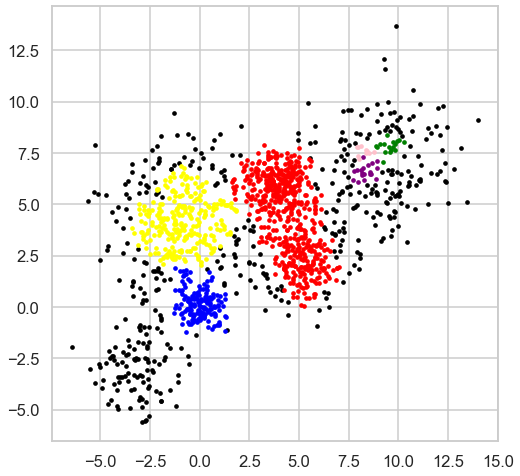

In [51]:
#visualizing the clusters

#noise
plt.scatter(Multi_blob_Data[labels==-1, 0], Multi_blob_Data[labels==-1,1], s=10, c='black')


plt.scatter(Multi_blob_Data[labels==0, 0], Multi_blob_Data[labels==0,1], s=10, c='blue')
plt.scatter(Multi_blob_Data[labels==1, 0], Multi_blob_Data[labels==1,1], s=10, c='red')
plt.scatter(Multi_blob_Data[labels==2, 0], Multi_blob_Data[labels==2,1], s=10, c='yellow')
plt.scatter(Multi_blob_Data[labels==3, 0], Multi_blob_Data[labels==3,1], s=10, c='green')
plt.scatter(Multi_blob_Data[labels==4, 0], Multi_blob_Data[labels==4,1], s=10, c='purple')
plt.scatter(Multi_blob_Data[labels==5, 0], Multi_blob_Data[labels==5,1], s=10, c='pink')
plt.show()

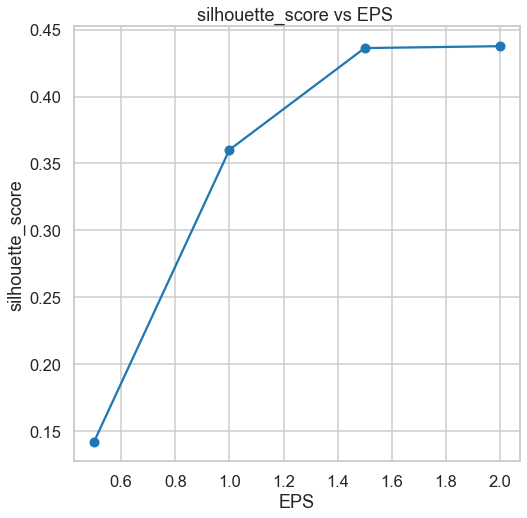

In [9]:
#looping over eps values and keeping min samples constant 

score=[] 
eps = [0.1, 0.5, 1, 1.5, 2, 3]
eps_valid=[]

for i in eps:
    db = DBSCAN(eps=i, min_samples=10)
    labels=db.fit(Multi_blob_Data)
    if(len(np.unique(db.labels_))>1):
        score.append(silhouette_score(Multi_blob_Data,labels.labels_,metric='euclidean'))
        eps_valid.append(i)
eps_valid
plt.plot(eps_valid, score, marker='o')
plt.title('silhouette_score vs EPS ')
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()


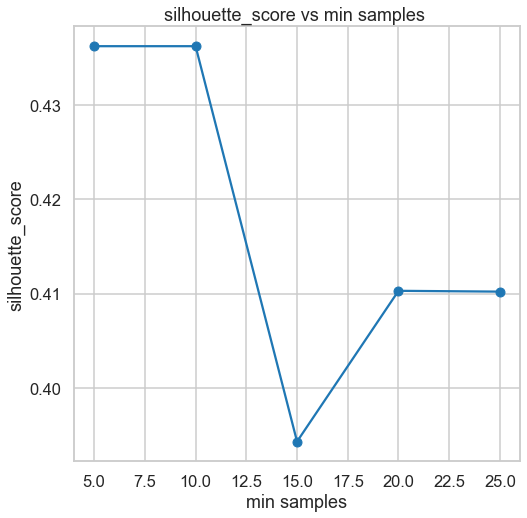

In [10]:
from sklearn.cluster import DBSCAN
import numpy as np

#looping over min samples and keeping eps value constant
score1=[] 
min_samples = [5, 10, 15, 20, 25]
min_samples_valid=[]

for i in min_samples:
    db = DBSCAN(eps=1.5, min_samples=i)
    labels=db.fit(Multi_blob_Data)
    if(len(np.unique(db.labels_))>1):
        score1.append(silhouette_score(Multi_blob_Data,labels.labels_,metric='euclidean'))
        min_samples_valid.append(i)
min_samples_valid
plt.plot(min_samples_valid, score1, marker='o')
plt.title('silhouette_score vs min samples ')
plt.xlabel('min samples')
plt.ylabel('silhouette_score')
plt.show()



In [15]:
#dbscan with best eps and min samples 

db = DBSCAN(eps=1.5, min_samples=10)
labels=db.fit_predict(Multi_blob_Data)
np.unique(labels)
silhouette_score(Multi_blob_Data,labels,metric='euclidean')

0.43621424543357235

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

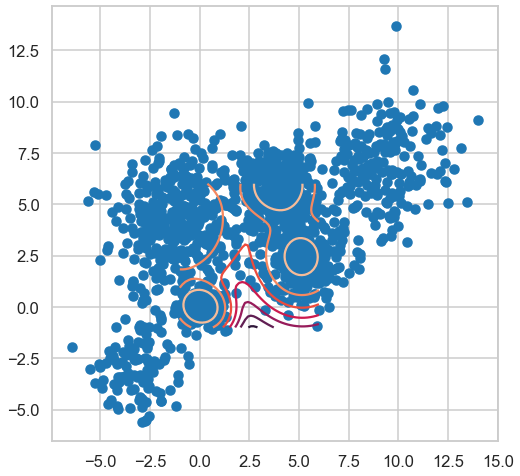

0.45347238469136353

In [35]:
import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='full')
gmm.fit(Multi_blob_Data)
labels = gmm.predict(Multi_blob_Data)


X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1])
plt.show()

silhouette1 = silhouette_score(Multi_blob_Data,labels,metric='euclidean')
silhouette1

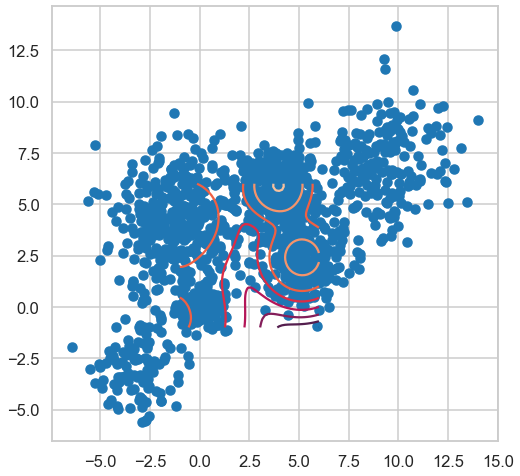

0.45357646907658333

In [36]:
import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='spherical')
gmm.fit(Multi_blob_Data)
labels = gmm.predict(Multi_blob_Data)

X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1])
plt.show()

silhouette2 = silhouette_score(Multi_blob_Data,labels,metric='euclidean')
silhouette2

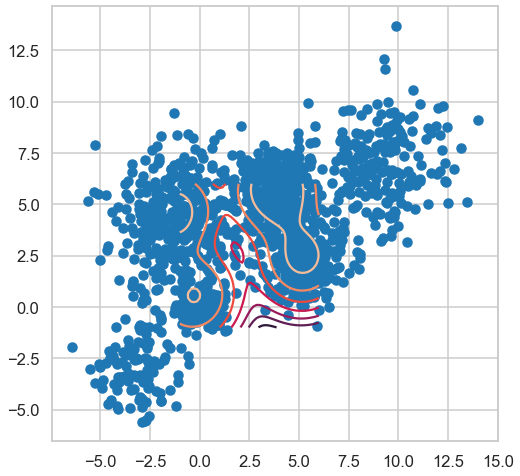

0.48598896083665893

In [37]:
import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='tied')
gmm.fit(Multi_blob_Data)
labels = gmm.predict(Multi_blob_Data)

X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1])
plt.show()

silhouette3 = silhouette_score(Multi_blob_Data,labels,metric='euclidean')
silhouette3

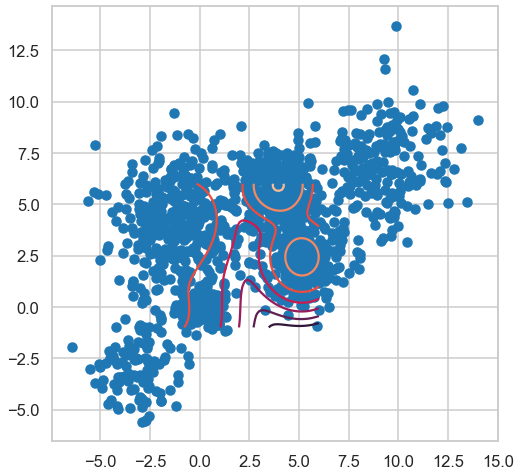

0.44658891639214526

In [38]:
import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, covariance_type='diag')
gmm.fit(Multi_blob_Data)
labels = gmm.predict(Multi_blob_Data)

X, Y = np.meshgrid(np.linspace(-1, 6), np.linspace(-1,6))
XX = np.array([X.ravel(), Y.ravel()]).T
Z = gmm.score_samples(XX)
Z = Z.reshape((50,50))
plt.contour(X, Y, Z)
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1])
plt.show()

silhouette4 = silhouette_score(Multi_blob_Data,labels,metric='euclidean')
silhouette4

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [26]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [27]:
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

In [28]:
iris = pd.DataFrame(
    data= np.c_[iris_data['data'], iris_data['target']],
    columns= iris_data['feature_names'] + ['target']
    )

In [82]:
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [41]:
iris.shape

(150, 5)

In [51]:

x= iris.iloc[:, :-1]
y= iris.iloc[:, -1]
x.head()
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [53]:
# split the data into train and test sets
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

#80% training set and 20% test set 
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 120 samples 
test set size: 30 samples


In [55]:
#normalizing data

scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

print('\nx train after Normalization')
print(normalized_x_train[0:5])


x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


In [60]:
#KNN

#choosing value of K 
import math
K=math.sqrt(len(x_train))
K

#choosing k to be an odd number so we will add 1 to the output k to become k=11 

10.954451150103322

In [62]:
knn=KNeighborsClassifier(11)
knn.fit(normalized_x_train, y_train)
y_pred= knn.predict(normalized_x_test)
print(y_pred)  

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [63]:
print(accuracy_score(y_test, y_pred))

1.0


In [7]:
#PCA 

#scaling features as pca is highly affected by scale of data
from sklearn.preprocessing import StandardScaler

features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Separating out the features
x = iris.loc[:, features].values

# Separating out the target
y = iris.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [8]:
#projecting 4d to 2d 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, iris[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-2.264703,0.480027,0.0
1,-2.080961,-0.674134,0.0
2,-2.364229,-0.341908,0.0
3,-2.299384,-0.597395,0.0
4,-2.389842,0.646835,0.0
...,...,...,...
145,1.870503,0.386966,2.0
146,1.564580,-0.896687,2.0
147,1.521170,0.269069,2.0
148,1.372788,1.011254,2.0


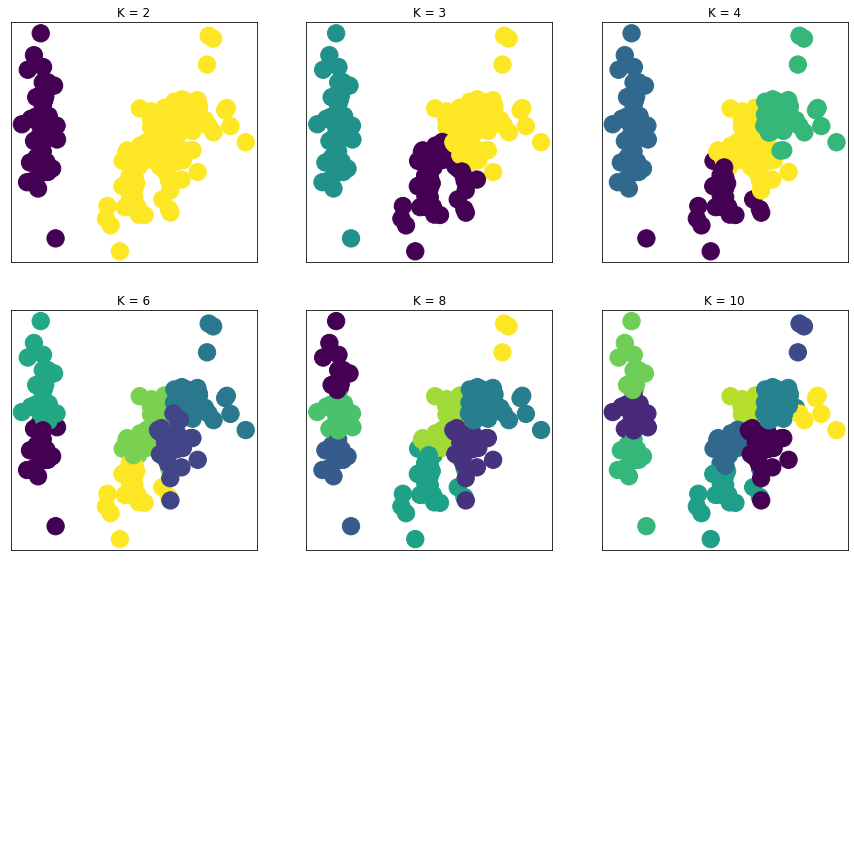

In [9]:
#KMEANS after pca 


inertias = []
clusters = []
K= [2, 3, 4, 6, 8, 10]
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(finalDf.values)
    inertias.append(kmeans.inertia_) 
    clusters.append(kmeans.labels_)
    
#visualize results for each value of K

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for x, ax in enumerate(axes):
    if x < len(K):
        ax.scatter(finalDf.values[:, 0], finalDf.values[:, 1], s=300, c=clusters[x])
        ax.set_title('K = {}'.format(K[x]))
        ax.set_xticks(())
        ax.set_yticks(())
    else:
        ax.axis('off')
        
plt.show()   

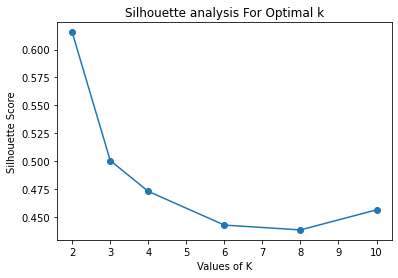

In [11]:
# silhouette score
silhouette_avg = []
for l in K:
    kmeans = KMeans(n_clusters=l)
    clusters= kmeans.fit(finalDf)
    silhouette_avg.append(silhouette_score(finalDf,kmeans.labels_,metric='euclidean'))
    
plt.plot(K,silhouette_avg)
plt.scatter(K,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score');
plt.title('Silhouette analysis For Optimal k')

#best silhouette score for k =2 as it has the highest score
bestsil_score = max(silhouette_avg)
bestsil_score

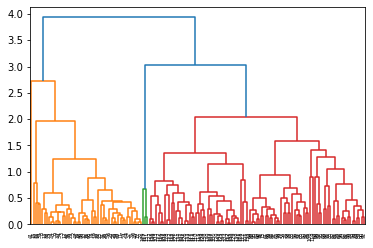

0.615555530208921

In [12]:
#hirarechal after pca

#euclidean average 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model.fit(finalDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(finalDf, method='average'))
plt.show()
#Silhouette score
silhouette1 = silhouette_score(finalDf.values,labels,metric='euclidean')
silhouette1

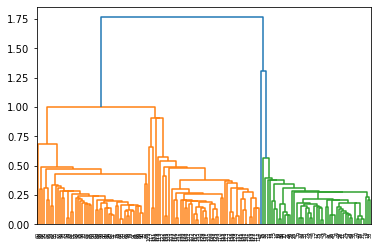

0.615555530208921

In [17]:
#euclidean single 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model.fit(finalDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(finalDf, method='single'))
plt.show()
#Silhouette score
silhouette2 = silhouette_score(finalDf.values,labels,metric='euclidean')
silhouette2

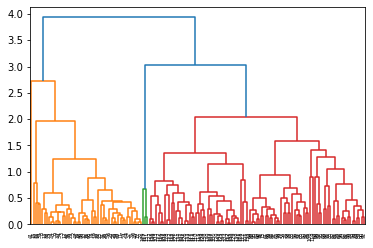

0.615555530208921

In [16]:
#manhattan average 
model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model.fit(finalDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(finalDf, method='average'))
plt.show()
#Silhouette score
silhouette3 = silhouette_score(finalDf.values,labels,metric='euclidean')
silhouette3

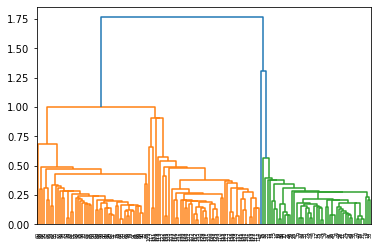

0.615555530208921

In [15]:
#manhattan single
model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single')
model.fit(finalDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(finalDf, method='single'))
plt.show()
#Silhouette score
silhouette4 = silhouette_score(finalDf.values,labels,metric='euclidean')
silhouette4

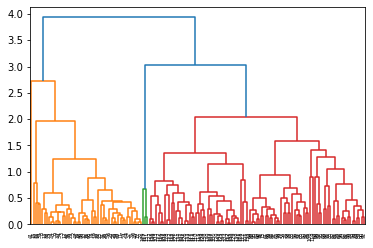

0.6098546299215551

In [14]:
#cosine average 
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model.fit(finalDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(finalDf, method='average'))
plt.show()
#Silhouette score
silhouette5 = silhouette_score(finalDf.values,labels,metric='euclidean')
silhouette5

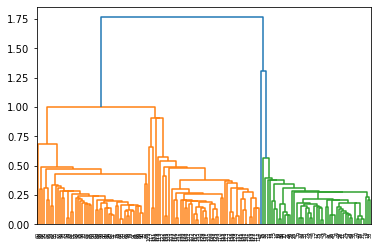

0.615555530208921

In [13]:
#cosine single
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')
model.fit(finalDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(finalDf, method='single'))
plt.show()
#Silhouette score
silhouette6 = silhouette_score(finalDf.values,labels,metric='euclidean')
silhouette6

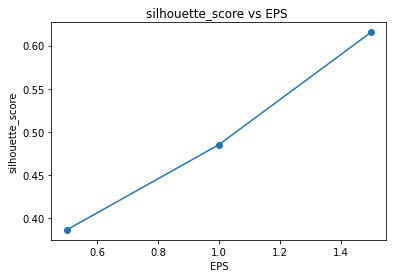

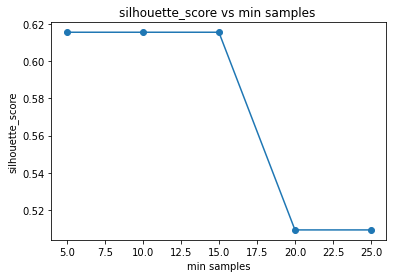

In [19]:
#DBSCAN after pca

from sklearn.cluster import DBSCAN
import numpy as np

#looping over eps values and keeping min samples constant 

score2=[] 
eps1 = [0.1, 0.5, 1, 1.5, 2, 3]
eps_valid1=[]

for i in eps1:
    db = DBSCAN(eps=i, min_samples=10)
    labels=db.fit(finalDf)
    if(len(np.unique(db.labels_))>1):
        score2.append(silhouette_score(finalDf,labels.labels_,metric='euclidean'))
        eps_valid1.append(i)
eps_valid1
plt.plot(eps_valid1, score2, marker='o')
plt.title('silhouette_score vs EPS ')
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()


#looping over min samples and keeping eps value constant
score3=[] 
min_samples3 = [5, 10, 15, 20, 25]
min_samples_valid3=[]

for i in min_samples3:
    db = DBSCAN(eps=1.5, min_samples=i)
    labels=db.fit(finalDf)
    if(len(np.unique(db.labels_))>1):
        score3.append(silhouette_score(finalDf,labels.labels_,metric='euclidean'))
        min_samples_valid3.append(i)
min_samples_valid3
plt.plot(min_samples_valid3, score3, marker='o')
plt.title('silhouette_score vs min samples ')
plt.xlabel('min samples')
plt.ylabel('silhouette_score')
plt.show()



In [20]:
#dbscan with best eps and min samples 

db = DBSCAN(eps=1.5, min_samples=10)
labels=db.fit_predict(finalDf)
np.unique(labels)
silhouette_score(finalDf,labels,metric='euclidean')

0.615555530208921

In [21]:
#GMM after pca

import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full')
x=gmm.fit(finalDf)
labels = x.predict(finalDf)
silhouette1 = silhouette_score(finalDf.values,labels,metric='euclidean')
silhouette1


0.615555530208921

In [22]:

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='spherical')
x=gmm.fit(finalDf)
labels = x.predict(finalDf)
silhouette1 = silhouette_score(finalDf.values,labels,metric='euclidean')
silhouette1


0.615555530208921

In [23]:


# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='tied')
x=gmm.fit(finalDf)
labels = x.predict(finalDf)
silhouette1 = silhouette_score(finalDf.values,labels,metric='euclidean')
silhouette1


0.615555530208921

In [24]:


# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='diag')
x=gmm.fit(finalDf)
labels = x.predict(finalDf)
silhouette1 = silhouette_score(finalDf.values,labels,metric='euclidean')
silhouette1


0.615555530208921

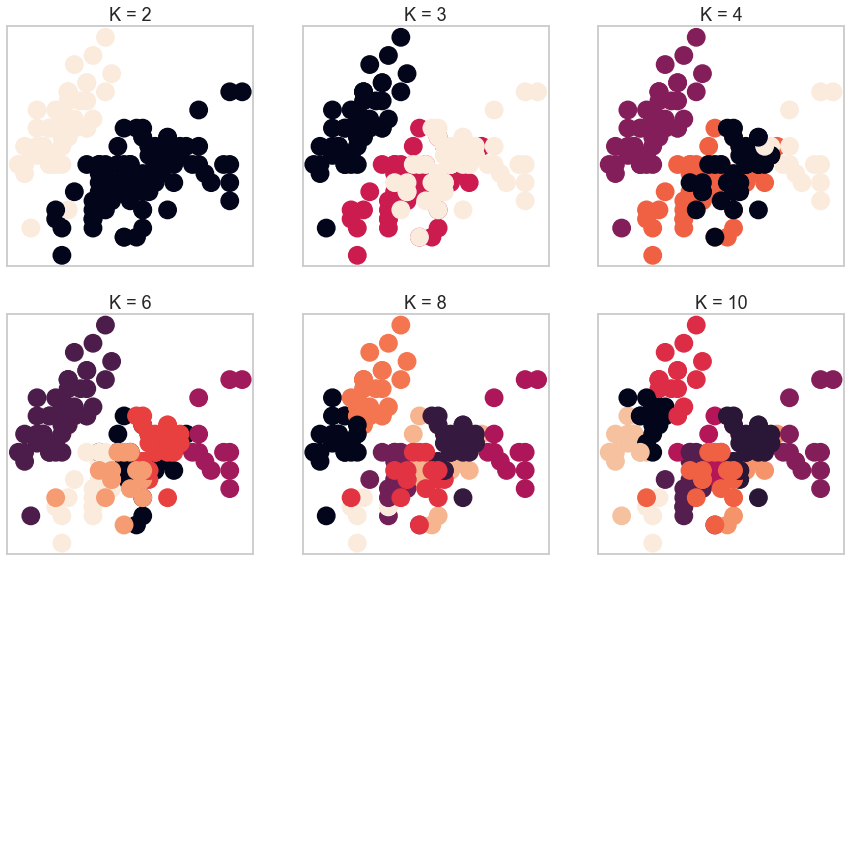

In [21]:
#KMEANS before normalization

inertias = []
clusters = []
K= [2, 3, 4, 6, 8, 10]
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(iris.values)
    inertias.append(kmeans.inertia_) 
    clusters.append(kmeans.labels_)
    
#visualize results for each value of K

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for x, ax in enumerate(axes):
    if x < len(K):
        ax.scatter(iris.values[:, 0], iris.values[:, 1], s=300, c=clusters[x])
        ax.set_title('K = {}'.format(K[x]))
        ax.set_xticks(())
        ax.set_yticks(())
    else:
        ax.axis('off')
        
plt.show()   

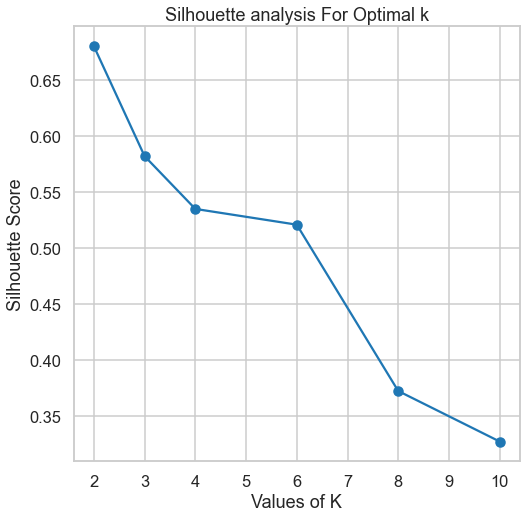

In [22]:
# silhouette score
silhouette_avg = []
for l in K:
    kmeans = KMeans(n_clusters=l)
    clusters= kmeans.fit(iris)
    silhouette_avg.append(silhouette_score(iris,kmeans.labels_,metric='euclidean'))
    
plt.plot(K,silhouette_avg)
plt.scatter(K,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score');
plt.title('Silhouette analysis For Optimal k')

#best silhouette score for k =2 as it has the highest score
bestsil_score = max(silhouette_avg)
bestsil_score

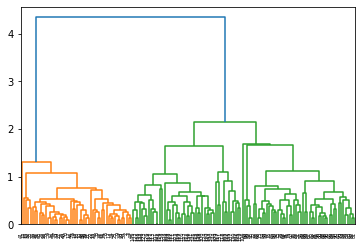

In [13]:
#hierarechal before normalization:

dendrogram = sch.dendrogram(sch.linkage(iris.values, method='average'))

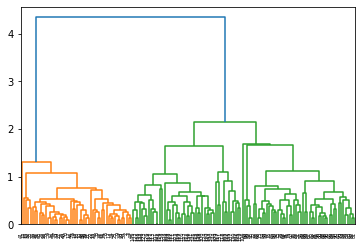

In [15]:
#euclidean average 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='average'))
plt.show()
#Silhouette score
silhouette1 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette1

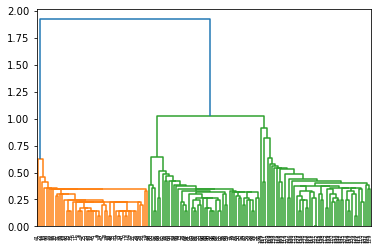

0.6825350504469878

In [17]:
#euclidean single 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='single'))
plt.show()
#Silhouette score
silhouette2 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette2

In [ ]:
#manhattan average 
model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='average'))
plt.show()
#Silhouette score
silhouette3 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette3

In [ ]:
#manhattan single
model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='single'))
plt.show()
#Silhouette score
silhouette4 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette4

In [ ]:
#cosine average 
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='average'))
plt.show()
#Silhouette score
silhouette5 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette5

In [ ]:
#cosine single
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='single'))
plt.show()
#Silhouette score
silhouette6 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette6

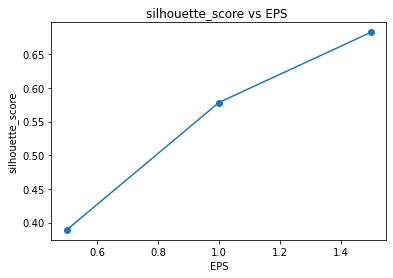

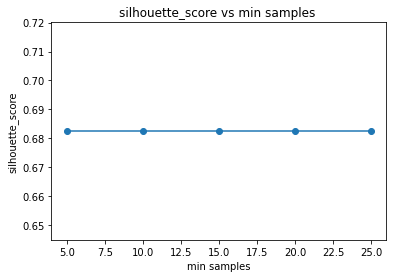

In [29]:
#DBScan before normalization:

from sklearn.cluster import DBSCAN
import numpy as np

#looping over eps values and keeping min samples constant 

score2=[] 
eps1 = [0.1, 0.5, 1, 1.5, 2, 3]
eps_valid1=[]

for i in eps1:
    db = DBSCAN(eps=i, min_samples=10)
    labels=db.fit(iris)
    if(len(np.unique(db.labels_))>1):
        score2.append(silhouette_score(iris,labels.labels_,metric='euclidean'))
        eps_valid1.append(i)
eps_valid1
plt.plot(eps_valid1, score2, marker='o')
plt.title('silhouette_score vs EPS ')
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()


#looping over min samples and keeping eps value constant
score3=[] 
min_samples3 = [5, 10, 15, 20, 25]
min_samples_valid3=[]

for i in min_samples3:
    db = DBSCAN(eps=1.5, min_samples=i)
    labels=db.fit(iris)
    if(len(np.unique(db.labels_))>1):
        score3.append(silhouette_score(iris,labels.labels_,metric='euclidean'))
        min_samples_valid3.append(i)
min_samples_valid3
plt.plot(min_samples_valid3, score3, marker='o')
plt.title('silhouette_score vs min samples ')
plt.xlabel('min samples')
plt.ylabel('silhouette_score')
plt.show()


#comments: silhouette score doesn't change with min samples which means that min samples has no effect on the iris dataset 

In [30]:
#dbscan with best eps and min samples 

db = DBSCAN(eps=1.5, min_samples=10)
labels=db.fit_predict(iris)
np.unique(labels)
silhouette_score(iris,labels,metric='euclidean')

0.6825350504469878

In [32]:
#GMM before normalization

import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full')
x=gmm.fit(iris)
labels = x.predict(iris)
silhouette1 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette1


0.6825350504469878

In [33]:

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='spherical')
x=gmm.fit(iris)
labels = x.predict(iris)
silhouette2 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette2


0.6825350504469878

In [34]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='tied')
x=gmm.fit(iris)
labels = x.predict(iris)
silhouette3 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette3

0.6825350504469878

In [35]:

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='diag')
x=gmm.fit(iris)
labels = x.predict(iris)
silhouette4 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette4

0.6825350504469878

In [39]:
#Normalization to transfer features to be on the same scale for better performance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


iris.iloc[:,0:-1] = scaler.fit_transform(iris.iloc[:,0:-1].to_numpy())
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0.0
1,-1.143017,-0.131979,-1.340227,-1.315444,0.0
2,-1.385353,0.328414,-1.397064,-1.315444,0.0
3,-1.506521,0.098217,-1.283389,-1.315444,0.0
4,-1.021849,1.249201,-1.340227,-1.315444,0.0
5,-0.537178,1.939791,-1.169714,-1.052180,0.0
6,-1.506521,0.788808,-1.340227,-1.183812,0.0
7,-1.021849,0.788808,-1.283389,-1.315444,0.0
8,-1.748856,-0.362176,-1.340227,-1.315444,0.0
9,-1.143017,0.098217,-1.283389,-1.447076,0.0


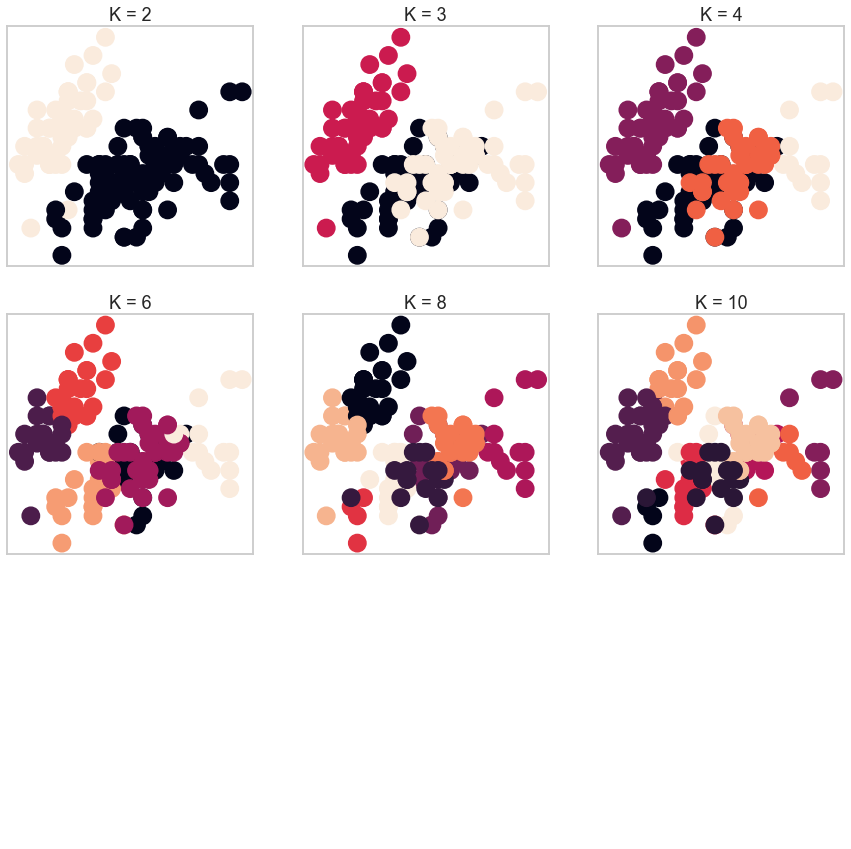

In [23]:
#KMEANS after normalization

inertias = []
clusters = []
K= [2, 3, 4, 6, 8, 10]
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(iris.values)
    inertias.append(kmeans.inertia_) 
    clusters.append(kmeans.labels_)
    
#visualize results for each value of K

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for x, ax in enumerate(axes):
    if x < len(K):
        ax.scatter(iris.values[:, 0], iris.values[:, 1], s=300, c=clusters[x])
        ax.set_title('K = {}'.format(K[x]))
        ax.set_xticks(())
        ax.set_yticks(())
    else:
        ax.axis('off')
        
plt.show()   

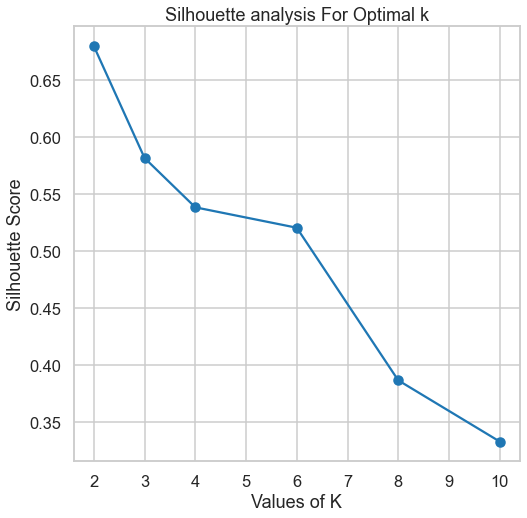

In [25]:
# silhouette score
silhouette_avg = []
for l in K:
    kmeans = KMeans(n_clusters=l)
    clusters= kmeans.fit(iris)
    silhouette_avg.append(silhouette_score(iris,kmeans.labels_,metric='euclidean'))
    
plt.plot(K,silhouette_avg)
plt.scatter(K,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score');
plt.title('Silhouette analysis For Optimal k')

#best silhouette score for k =2 as it has the highest score
bestsil_score = max(silhouette_avg)
bestsil_score

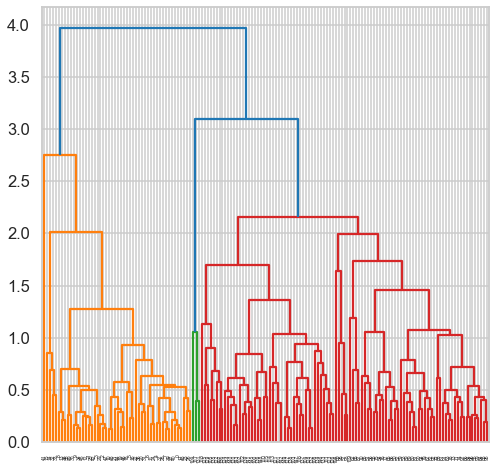

0.5881470967915747

In [53]:
#hirarechal after normalization

#euclidean average 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='average'))
plt.show()
#Silhouette score
silhouette1 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette1

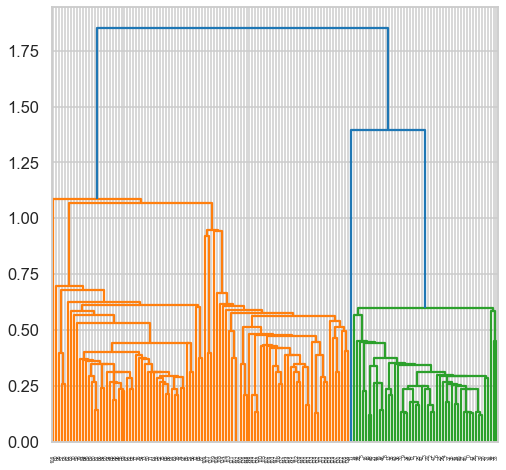

0.5881470967915747

In [54]:
#euclidean single 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='single'))
plt.show()
#Silhouette score
silhouette2 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette2

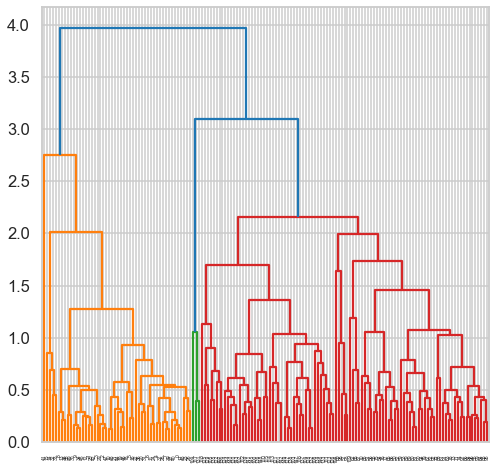

0.5881470967915747

In [55]:
#manhattan average 
model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='average'))
plt.show()
#Silhouette score
silhouette3 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette3

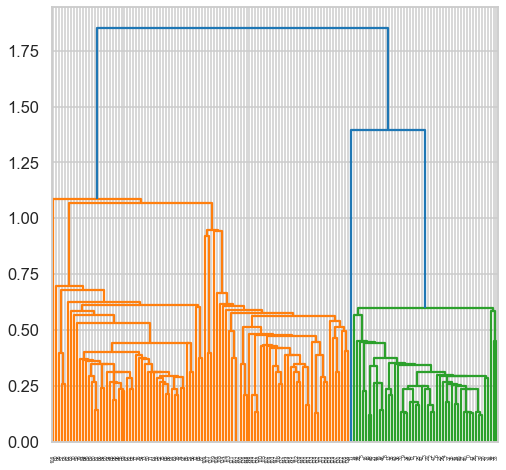

0.5881470967915747

In [56]:
#manhattan single
model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='single'))
plt.show()
#Silhouette score
silhouette4 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette4

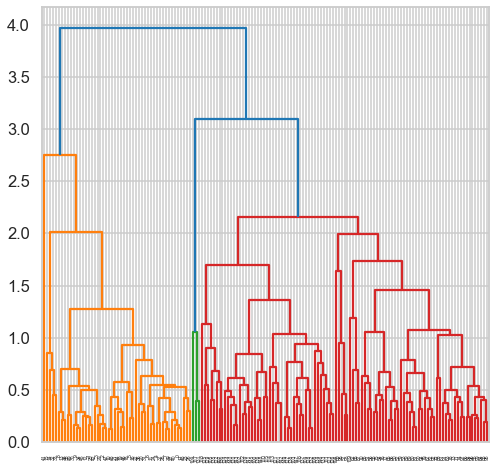

0.5825078759920117

In [57]:
#cosine average 
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='average'))
plt.show()
#Silhouette score
silhouette5 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette5

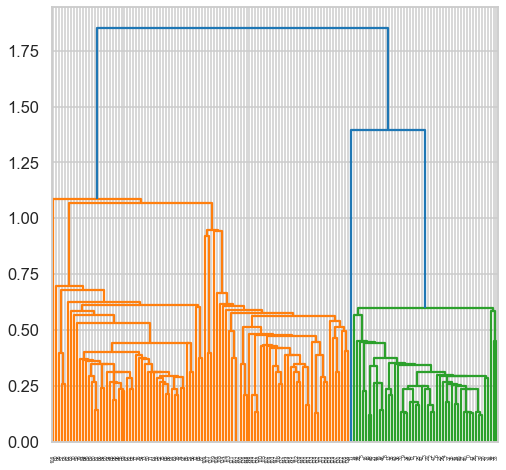

0.5881470967915747

In [58]:
#cosine single
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')
model.fit(iris)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(iris, method='single'))
plt.show()
#Silhouette score
silhouette6 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette6

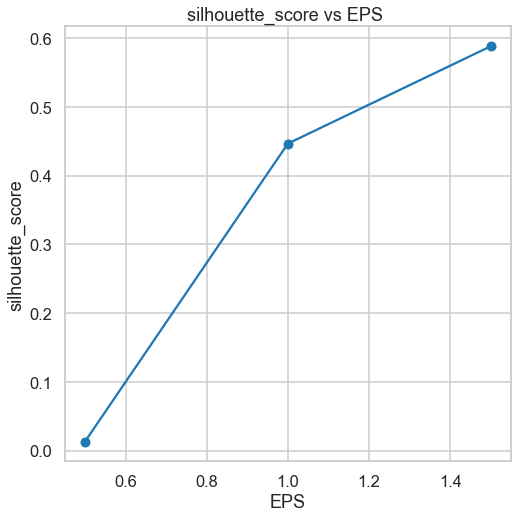

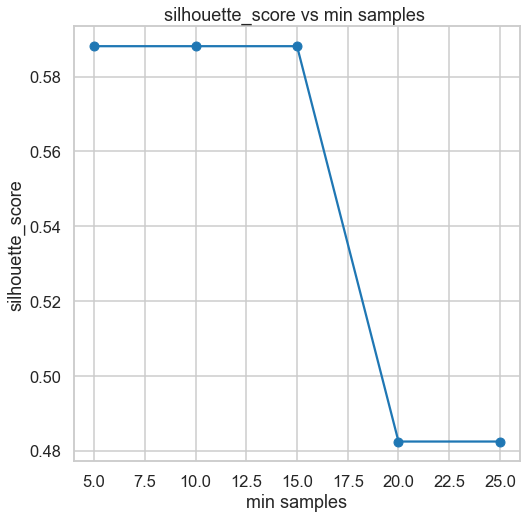

In [59]:
#DBScan after normalization:

from sklearn.cluster import DBSCAN
import numpy as np

#looping over eps values and keeping min samples constant 

score2=[] 
eps1 = [0.1, 0.5, 1, 1.5, 2, 3]
eps_valid1=[]

for i in eps1:
    db = DBSCAN(eps=i, min_samples=10)
    labels=db.fit(iris)
    if(len(np.unique(db.labels_))>1):
        score2.append(silhouette_score(iris,labels.labels_,metric='euclidean'))
        eps_valid1.append(i)
eps_valid1
plt.plot(eps_valid1, score2, marker='o')
plt.title('silhouette_score vs EPS ')
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()


#looping over min samples and keeping eps value constant
score3=[] 
min_samples3 = [5, 10, 15, 20, 25]
min_samples_valid3=[]

for i in min_samples3:
    db = DBSCAN(eps=1.5, min_samples=i)
    labels=db.fit(iris)
    if(len(np.unique(db.labels_))>1):
        score3.append(silhouette_score(iris,labels.labels_,metric='euclidean'))
        min_samples_valid3.append(i)
min_samples_valid3
plt.plot(min_samples_valid3, score3, marker='o')
plt.title('silhouette_score vs min samples ')
plt.xlabel('min samples')
plt.ylabel('silhouette_score')
plt.show()


In [37]:
#dbscan with best eps and min samples 

db = DBSCAN(eps=1.5, min_samples=10)
labels=db.fit_predict(iris)
np.unique(labels)
silhouette_score(iris,labels,metric='euclidean')

0.6825350504469878

In [28]:
#GMM after normalization

import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='full')
x=gmm.fit(iris)
labels = x.predict(iris)
silhouette1 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette1

0.6825350504469878

In [29]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='spherical')
x=gmm.fit(iris)
labels = x.predict(iris)
silhouette2 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette2

0.6825350504469878

In [30]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='tied')
x=gmm.fit(iris)
labels = x.predict(iris)
silhouette3 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette3

0.6825350504469878

In [31]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='diag')
x=gmm.fit(iris)
labels = x.predict(iris)
silhouette4 = silhouette_score(iris.values,labels,metric='euclidean')
silhouette4

0.6825350504469878

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [20]:
df=pd.read_csv('Customer data.csv')

In [21]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [51]:
df.shape

(2000, 8)

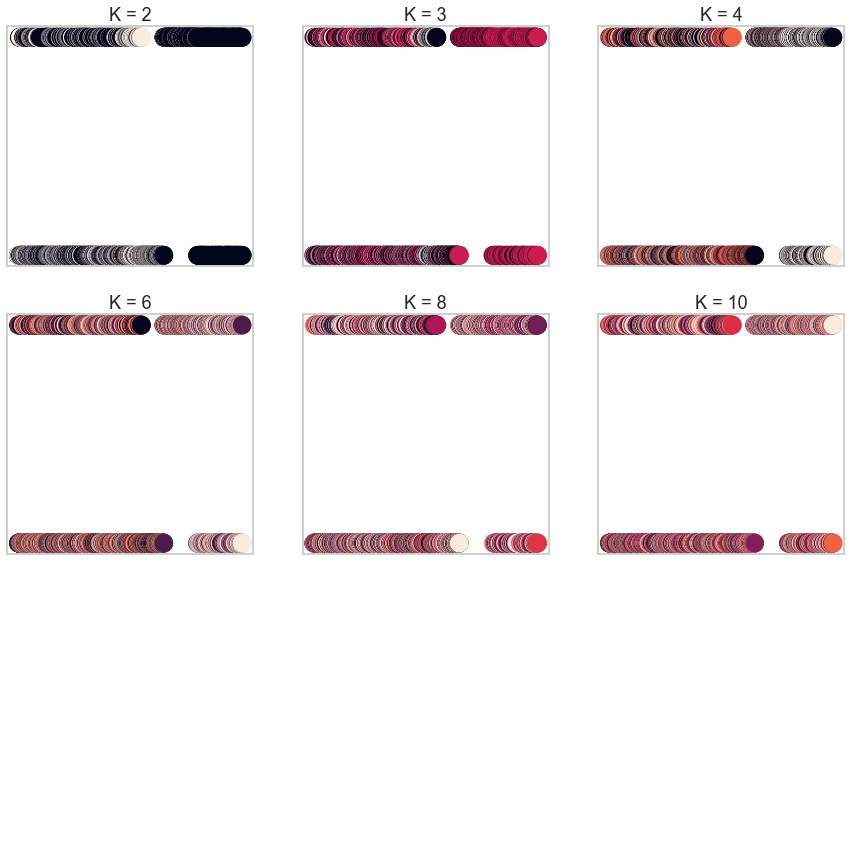

In [27]:
#KMEANS before normalization:


inertias = []
clusters = []
K= [2, 3, 4, 6, 8, 10]
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.values)
    inertias.append(kmeans.inertia_) 
    clusters.append(kmeans.labels_)
    
#visualize results for each value of K

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for x, ax in enumerate(axes):
    if x < len(K):
        ax.scatter(df.values[:, 0], df.values[:, 1], s=300, c=clusters[x])
        ax.set_title('K = {}'.format(K[x]))
        ax.set_xticks(())
        ax.set_yticks(())
    else:
        ax.axis('off')
        
plt.show()   

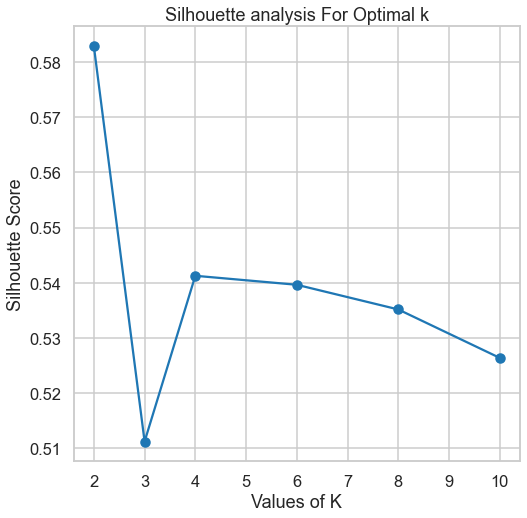

In [28]:
# silhouette score
silhouette_avg = []
for l in K:
    kmeans = KMeans(n_clusters=l)
    clusters= kmeans.fit(df)
    silhouette_avg.append(silhouette_score(df,kmeans.labels_,metric='euclidean'))
    
plt.plot(K,silhouette_avg)
plt.scatter(K,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score');
plt.title('Silhouette analysis For Optimal k')

#best silhouette score for k =2 as it has the highest score
bestsil_score = max(silhouette_avg)
bestsil_score

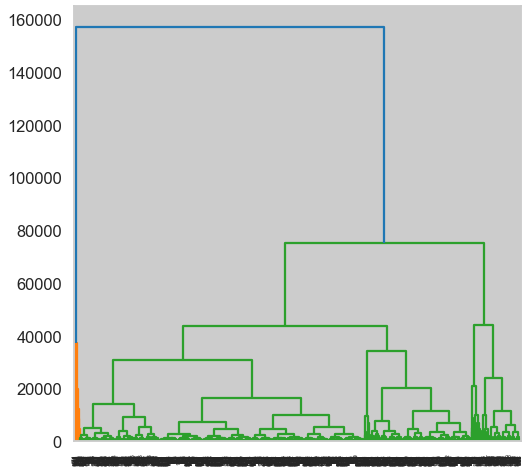

In [25]:
#hierarechal before normalization:

dendrogram = sch.dendrogram(sch.linkage(df.values, method='average'))

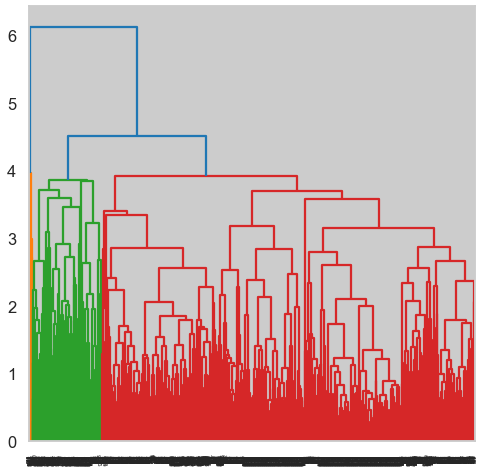

0.37386054050750583

In [42]:
#euclidean average 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))
plt.show()
#Silhouette score
silhouette1 = silhouette_score(df.values,labels,metric='euclidean')
silhouette1

In [ ]:
#euclidean single 
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='single'))
plt.show()
#Silhouette score
silhouette2 = silhouette_score(df.values,labels,metric='euclidean')
silhouette2

In [ ]:
#manhattan average 
model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='average')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))
plt.show()
#Silhouette score
silhouette3 = silhouette_score(df.values,labels,metric='euclidean')
silhouette3

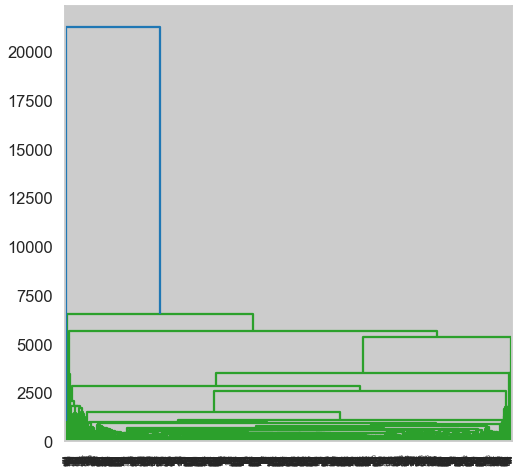

In [24]:
#manhattan single
model = AgglomerativeClustering(n_clusters=2, affinity='manhattan', linkage='single')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='single'))
plt.show()
#Silhouette score
silhouette4 = silhouette_score(df.values,labels,metric='euclidean')
silhouette4

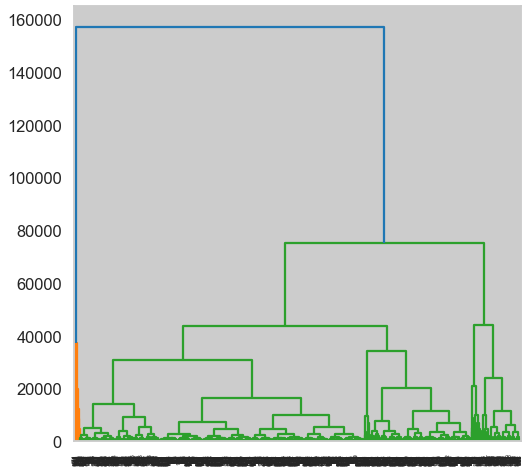

In [23]:
#cosine average 
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='average')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))
plt.show()
#Silhouette score
silhouette5 = silhouette_score(df.values,labels,metric='euclidean')
silhouette5 

In [ ]:
#cosine single
model = AgglomerativeClustering(n_clusters=2, affinity='cosine', linkage='single')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='single'))
plt.show()
#Silhouette score
silhouette6 = silhouette_score(df.values,labels,metric='euclidean')
silhouette6 

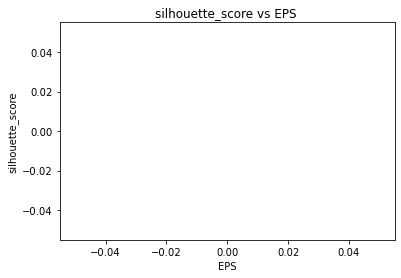

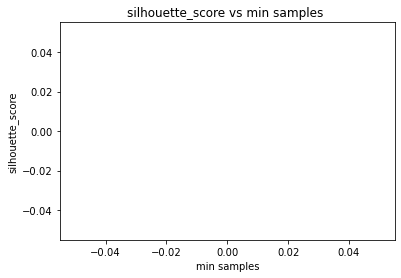

In [21]:
#DBScan before normalization:

from sklearn.cluster import DBSCAN
import numpy as np

#looping over eps values and keeping min samples constant 

score2=[] 
eps1 = [0.1, 0.5, 1, 1.5, 2, 3]
eps_valid1=[]

for i in eps1:
    db = DBSCAN(eps=i, min_samples=10)
    labels=db.fit(df)
    if(len(np.unique(db.labels_))>1):
        score2.append(silhouette_score(df,labels.labels_,metric='euclidean'))
        eps_valid1.append(i)
eps_valid1
plt.plot(eps_valid1, score2, marker='o')
plt.title('silhouette_score vs EPS ')
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()


#looping over min samples and keeping eps value constant
score3=[] 
min_samples3 = [5, 10, 15, 20, 25]
min_samples_valid3=[]

for i in min_samples3:
    db = DBSCAN(eps=1.5, min_samples=i)
    labels=db.fit(df)
    if(len(np.unique(db.labels_))>1):
        score3.append(silhouette_score(df,labels.labels_,metric='euclidean'))
        min_samples_valid3.append(i)
min_samples_valid3
plt.plot(min_samples_valid3, score3, marker='o')
plt.title('silhouette_score vs min samples ')
plt.xlabel('min samples')
plt.ylabel('silhouette_score')
plt.show()

#comments: no clustering, data may be very close to each other thus dbscan can't cluster 

In [47]:
#GMM before normalization

import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='spherical')
x=gmm.fit(df)
labels = x.predict(df)
silhouette1 = silhouette_score(df.values,labels,metric='euclidean')
silhouette1


0.17100162584120904

In [48]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='spherical')
x=gmm.fit(df)
labels = x.predict(df)
silhouette2 = silhouette_score(df.values,labels,metric='euclidean')
silhouette2

0.1711497731416253

In [49]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='tied')
x=gmm.fit(df)
labels = x.predict(df)
silhouette3 = silhouette_score(df.values,labels,metric='euclidean')
silhouette3


0.22784488868633054

In [50]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type='diag')
x=gmm.fit(df)
labels = x.predict(df)
silhouette4 = silhouette_score(df.values,labels,metric='euclidean')
silhouette4



0.17734574987119647

In [22]:
#Normalization to transfer features to be on the same scale for better performance

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


df.iloc[:,0:-1] = scaler.fit_transform(df.iloc[:,0:-1].to_numpy())
df.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-1.731185,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,2
1,-1.729453,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,2
2,-1.727721,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,0
3,-1.725989,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,1
4,-1.724257,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,1
5,-1.722525,-0.917399,-0.993024,-0.077583,-0.063372,0.627140,-1.269525,0
6,-1.720793,-0.917399,-0.993024,1.458716,-0.063372,0.932841,0.296823,1
7,-1.719061,-0.917399,-0.993024,-0.077583,-0.063372,1.907295,1.863171,1
8,-1.717329,-0.917399,1.007025,2.141515,1.604323,0.804125,-1.269525,0
9,-1.715597,-0.917399,1.007025,-0.675033,-0.063372,1.409254,1.863171,0


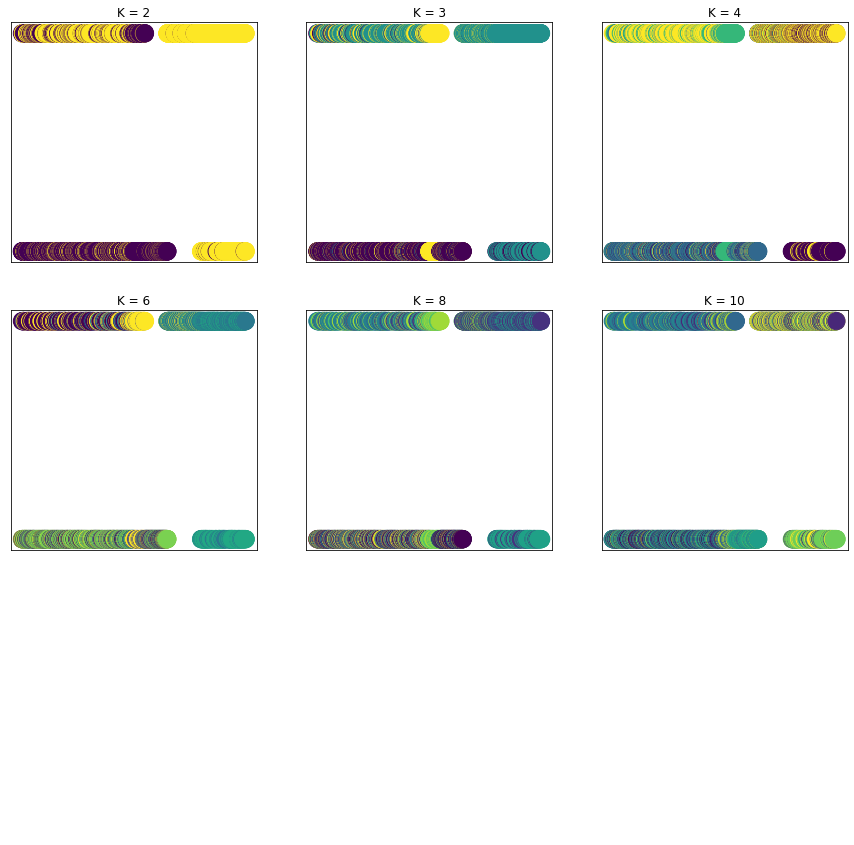

In [23]:
#KMEANS after normalization 

inertias = []
clusters = []
K= [2, 3, 4, 6, 8, 10]
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df.values)
    inertias.append(kmeans.inertia_) 
    clusters.append(kmeans.labels_)
    
#visualize results for each value of K

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for x, ax in enumerate(axes):
    if x < len(K):
        ax.scatter(df.values[:, 0], df.values[:, 1], s=300, c=clusters[x])
        ax.set_title('K = {}'.format(K[x]))
        ax.set_xticks(())
        ax.set_yticks(())
    else:
        ax.axis('off')
        
plt.show()   

0.24989547852711883

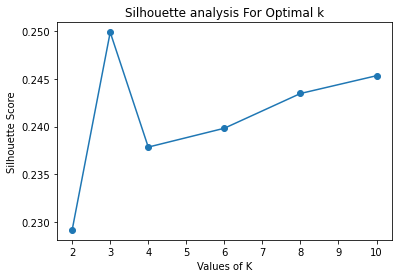

In [24]:
# silhouette score
silhouette_avg = []
for l in K:
    kmeans = KMeans(n_clusters=l)
    clusters= kmeans.fit(df)
    silhouette_avg.append(silhouette_score(df,kmeans.labels_,metric='euclidean'))
    
plt.plot(K,silhouette_avg)
plt.scatter(K,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score');
plt.title('Silhouette analysis For Optimal k')

#best silhouette score for k =3 as it has the highest score
bestsil_score = max(silhouette_avg)
bestsil_score

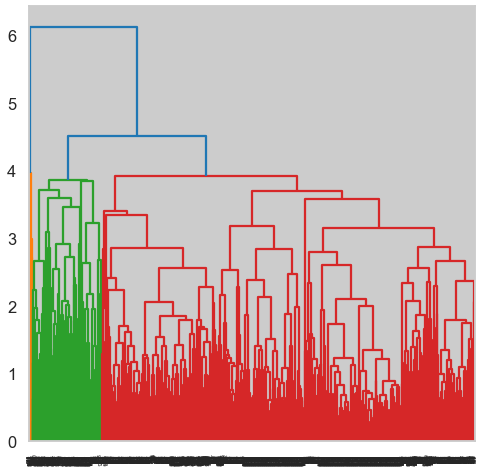

0.2287298311719909

In [41]:
#hirarechal after normalization

#euclidean average 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))
plt.show()
#Silhouette score
silhouette1 = silhouette_score(df.values,labels,metric='euclidean')
silhouette1

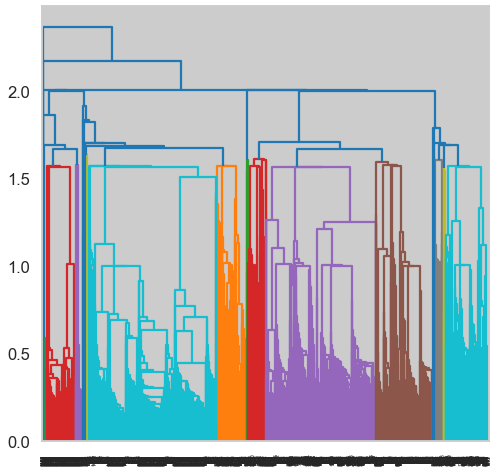

In [34]:
#euclidean single 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='single'))
plt.show()
#Silhouette score
silhouette2 = silhouette_score(df.values,labels,metric='euclidean')
silhouette2

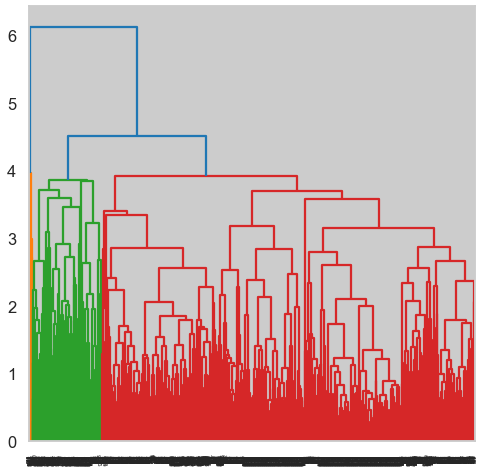

In [35]:
#manhattan average 
model = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))
plt.show()
#Silhouette score
silhouette3 = silhouette_score(df.values,labels,metric='euclidean')
silhouette3

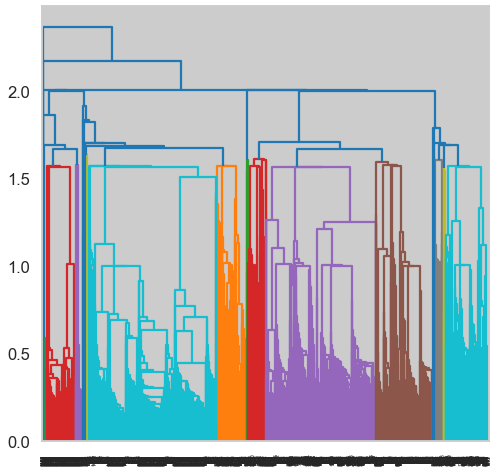

In [36]:
#manhattan single
model = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='single')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='single'))
plt.show()
#Silhouette score
silhouette4 = silhouette_score(df.values,labels,metric='euclidean')
silhouette4 

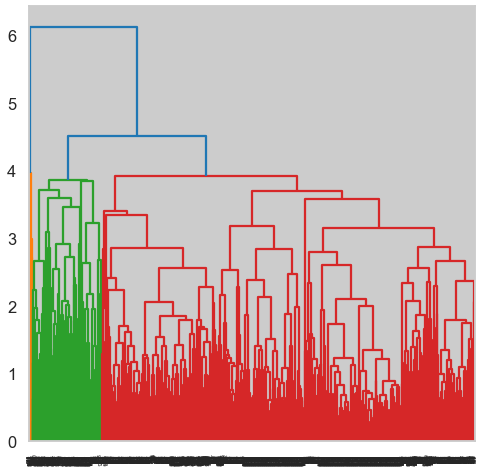

In [37]:
#cosine average 
model = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='average'))
plt.show()
#Silhouette score
silhouette5 = silhouette_score(df.values,labels,metric='euclidean')
silhouette5

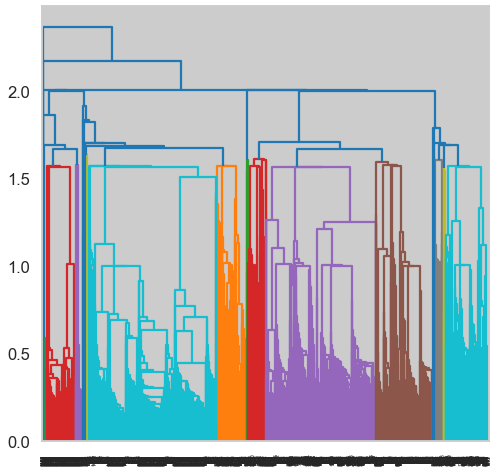

In [38]:
#cosine single
model = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='single')
model.fit(df)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(df, method='single'))
plt.show()
#Silhouette score
silhouette6 = silhouette_score(df.values,labels,metric='euclidean')
silhouette6

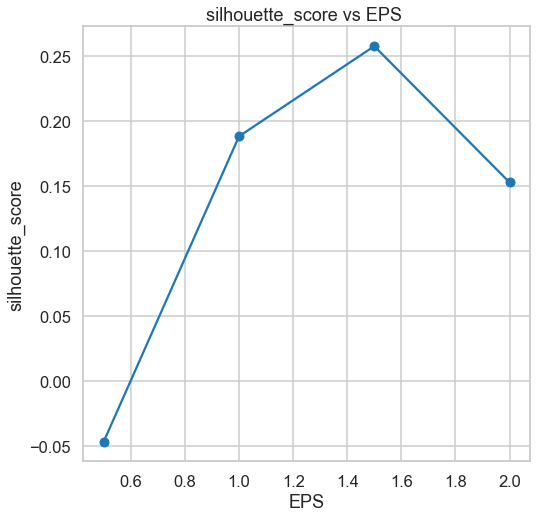

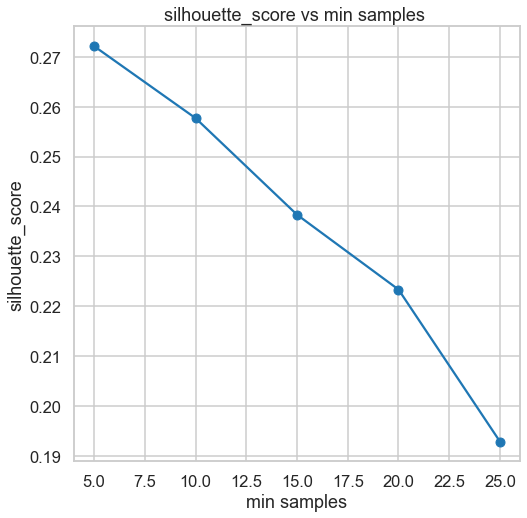

In [39]:
#DBSCAN after normalization

from sklearn.cluster import DBSCAN
import numpy as np

#looping over eps values and keeping min samples constant 

score2=[] 
eps1 = [0.1, 0.5, 1, 1.5, 2, 3]
eps_valid1=[]

for i in eps1:
    db = DBSCAN(eps=i, min_samples=10)
    labels=db.fit(df)
    if(len(np.unique(db.labels_))>1):
        score2.append(silhouette_score(df,labels.labels_,metric='euclidean'))
        eps_valid1.append(i)
eps_valid1
plt.plot(eps_valid1, score2, marker='o')
plt.title('silhouette_score vs EPS ')
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()


#looping over min samples and keeping eps value constant
score3=[] 
min_samples3 = [5, 10, 15, 20, 25]
min_samples_valid3=[]

for i in min_samples3:
    db = DBSCAN(eps=1.5, min_samples=i)
    labels=db.fit(df)
    if(len(np.unique(db.labels_))>1):
        score3.append(silhouette_score(df,labels.labels_,metric='euclidean'))
        min_samples_valid3.append(i)
min_samples_valid3
plt.plot(min_samples_valid3, score3, marker='o')
plt.title('silhouette_score vs min samples ')
plt.xlabel('min samples')
plt.ylabel('silhouette_score')
plt.show()


In [40]:
#dbscan with best eps and min samples 

db = DBSCAN(eps=1.5, min_samples=5)
labels=db.fit_predict(df)
np.unique(labels)
silhouette_score(df,labels,metric='euclidean')

0.27214629162814646

In [43]:
#GMM after normalization
import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full')
x=gmm.fit(df)
labels = x.predict(df)
silhouette1 = silhouette_score(df.values,labels,metric='euclidean')
silhouette1

0.21847380724923893

In [44]:


# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='spherical')
x=gmm.fit(df)
labels = x.predict(df)
silhouette1 = silhouette_score(df.values,labels,metric='euclidean')
silhouette1

0.23955486362341663

In [45]:


# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='tied')
x=gmm.fit(df)
labels = x.predict(df)
silhouette1 = silhouette_score(df.values,labels,metric='euclidean')
silhouette1

0.21779344071581153

In [46]:


# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='diag')
x=gmm.fit(df)
labels = x.predict(df)
silhouette1 = silhouette_score(df.values,labels,metric='euclidean')
silhouette1

0.22281148059288547

In [5]:
#PCA 
#scaling features as pca is highly affected by scale of data
from sklearn.preprocessing import StandardScaler

features = ['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Settlement size']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


In [6]:
#projecting 7d to 2d 

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

pcaDf = pd.concat([principalDf, df[['Settlement size']]], axis = 1)
pcaDf

,principal component 1,principal component 2,Settlement size
0,2.678205,0.795194,2
1,0.071118,0.471728,2
2,0.584459,-0.973760,0
3,2.332476,-0.698538,1
4,2.277743,-0.564664,1
...,...,...,...
1995,-0.998256,0.437368,0
1996,-1.477737,0.915827,0
1997,-1.573384,-2.116636,0
1998,-2.582413,0.691162,0


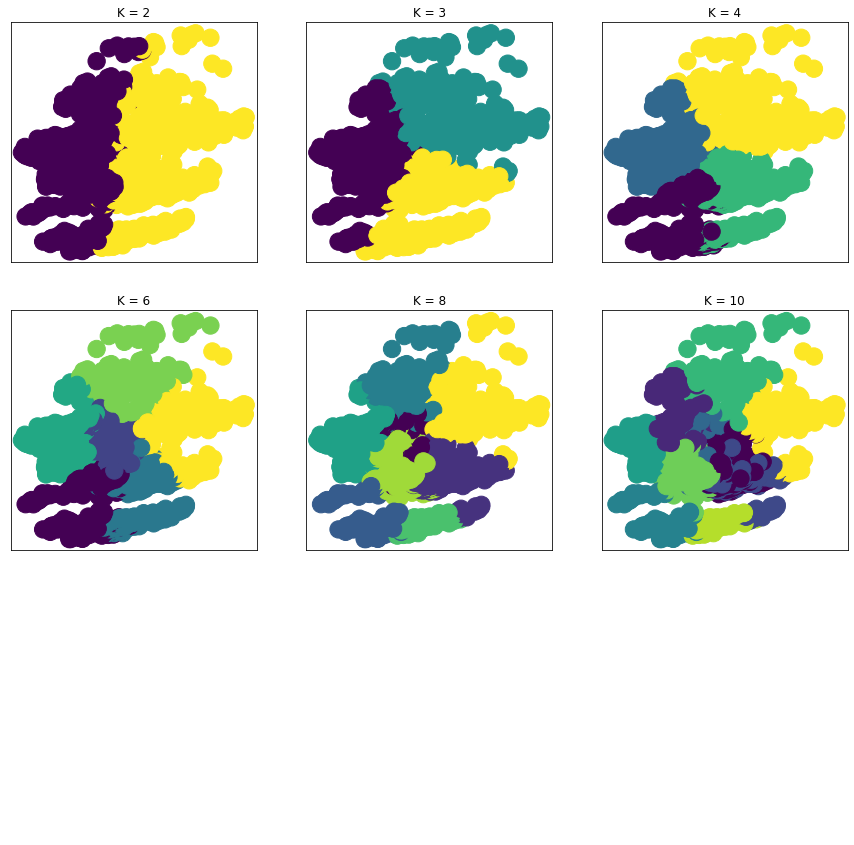

In [7]:
#KMEANS after pca

inertias = []
clusters = []
K= [2, 3, 4, 6, 8, 10]
for i in K:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pcaDf.values)
    inertias.append(kmeans.inertia_) 
    clusters.append(kmeans.labels_)
    
#visualize results for each value of K

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.ravel()
for x, ax in enumerate(axes):
    if x < len(K):
        ax.scatter(pcaDf.values[:, 0], pcaDf.values[:, 1], s=300, c=clusters[x])
        ax.set_title('K = {}'.format(K[x]))
        ax.set_xticks(())
        ax.set_yticks(())
    else:
        ax.axis('off')
        
plt.show()   

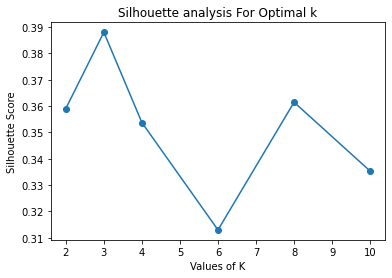

In [8]:
# silhouette score
silhouette_avg = []
for l in K:
    kmeans = KMeans(n_clusters=l)
    clusters= kmeans.fit(pcaDf)
    silhouette_avg.append(silhouette_score(pcaDf,kmeans.labels_,metric='euclidean'))
    
plt.plot(K,silhouette_avg)
plt.scatter(K,silhouette_avg)
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score');
plt.title('Silhouette analysis For Optimal k')

#best silhouette score for k =3 as it has the highest score
bestsil_score = max(silhouette_avg)

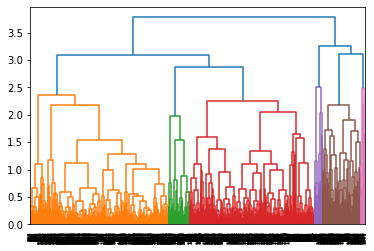

0.278025826808574

In [15]:
#hirarechal after pca

#euclidean average 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
model.fit(pcaDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(pcaDf, method='average'))
plt.show()
#Silhouette score
silhouette1 = silhouette_score(pcaDf.values,labels,metric='euclidean')
silhouette1

In [ ]:
#euclidean single 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
model.fit(pcaDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(pcaDf, method='single'))
plt.show()
#Silhouette score
silhouette2 = silhouette_score(pcaDf.values,labels,metric='euclidean')
silhouette2

In [ ]:
#manhattan average 
model = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')
model.fit(pcaDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(pcaDf, method='average'))
plt.show()
#Silhouette score
silhouette3 = silhouette_score(pcaDf.values,labels,metric='euclidean')
silhouette3

In [ ]:
#manhattan single
model = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='single')
model.fit(pcaDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(pcaDf, method='single'))
plt.show()
#Silhouette score
silhouette4 = silhouette_score(pcaDf.values,labels,metric='euclidean')
silhouette4

In [ ]:
#cosine average 
model = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='average')
model.fit(pcaDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(pcaDf, method='average'))
plt.show()
#Silhouette score
silhouette5 = silhouette_score(pcaDf.values,labels,metric='euclidean')
silhouette5

In [ ]:
#cosine single
model = AgglomerativeClustering(n_clusters=3, affinity='cosine', linkage='single')
model.fit(pcaDf)
labels = model.labels_
dendrogram = sch.dendrogram(sch.linkage(pcaDf, method='single'))
plt.show()
#Silhouette score
silhouette6 = silhouette_score(pcaDf.values,labels,metric='euclidean')
silhouette6

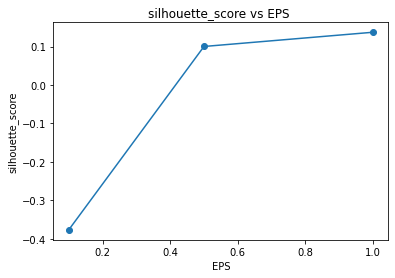

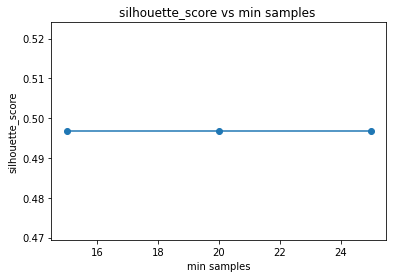

In [9]:
#DBSCAN after pca

from sklearn.cluster import DBSCAN
import numpy as np

#looping over eps values and keeping min samples constant 

score2=[] 
eps1 = [0.1, 0.5, 1, 1.5, 2, 3]
eps_valid1=[]

for i in eps1:
    db = DBSCAN(eps=i, min_samples=10)
    labels=db.fit(pcaDf)
    if(len(np.unique(db.labels_))>1):
        score2.append(silhouette_score(pcaDf,labels.labels_,metric='euclidean'))
        eps_valid1.append(i)
eps_valid1
plt.plot(eps_valid1, score2, marker='o')
plt.title('silhouette_score vs EPS ')
plt.xlabel('EPS')
plt.ylabel('silhouette_score')
plt.show()


#looping over min samples and keeping eps value constant
score3=[] 
min_samples3 = [5, 10, 15, 20, 25]
min_samples_valid3=[]

for i in min_samples3:
    db = DBSCAN(eps=1.5, min_samples=i)
    labels=db.fit(pcaDf)
    if(len(np.unique(db.labels_))>1):
        score3.append(silhouette_score(pcaDf,labels.labels_,metric='euclidean'))
        min_samples_valid3.append(i)
min_samples_valid3
plt.plot(min_samples_valid3, score3, marker='o')
plt.title('silhouette_score vs min samples ')
plt.xlabel('min samples')
plt.ylabel('silhouette_score')
plt.show()


In [10]:
#dbscan with best eps and min samples 

db = DBSCAN(eps=1, min_samples=10)
labels=db.fit_predict(pcaDf)
np.unique(labels)
silhouette_score(pcaDf,labels,metric='euclidean')

0.13728665205423624

In [11]:
#GMM after pca 

import pandas as pd

# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='full')
x=gmm.fit(pcaDf)
labels = x.predict(pcaDf)
silhouette1 = silhouette_score(pcaDf.values,labels,metric='euclidean')
silhouette1

0.2519356450591679

In [12]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='spherical')
x=gmm.fit(pcaDf)
labels = x.predict(pcaDf)
silhouette1 = silhouette_score(pcaDf.values,labels,metric='euclidean')
silhouette1

0.35526724894637346

In [13]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='tied')
x=gmm.fit(pcaDf)
labels = x.predict(pcaDf)
silhouette1 = silhouette_score(pcaDf.values,labels,metric='euclidean')
silhouette1

0.33933372736947803

In [14]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3, covariance_type='diag')
x=gmm.fit(pcaDf)
labels = x.predict(pcaDf)
silhouette1 = silhouette_score(pcaDf.values,labels,metric='euclidean')
silhouette1

0.25675197187556337